/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Iteration 1, loss = 1.67487508
Iteration 2, loss = 1.33850581
Iteration 3, loss = 1.09277432
Iteration 4, loss = 0.90999374
Iteration 5, loss = 0.76782010
Iteration 6, loss = 0.65704998
Iteration 7, loss = 0.57690018
Iteration 8, loss = 0.52385535
Iteration 9, loss = 0.49192409
Iteration 10, loss = 0.47356165
Iteration 11, loss = 0.46299776
Iteration 12, loss = 0.45673171
Iteration 13, loss = 0.45264564
Iteration 14, loss = 0.44984636
Iteration 15, loss = 0.44753975
Iteration 16, loss = 0.44572947
Iteration 17, loss = 0.44416027
Iteration 18, loss = 0.44275793
Iteration 19, loss = 0.44145290
Iteration 20, loss = 0.44024429
Iteration 21, loss = 0.43908098
Iteration 22, loss = 0.43798802
Iteration 23, loss = 0.43704108
Iteration 24, loss = 0.43613567
Iteration 25, loss = 0.43527377
Iteration 26, loss = 0.43448521
Iteration 27, loss = 0.43361567
Iteration 28, loss = 0.43281842
Iteration 29, loss = 0.43194975
Iteration 30, loss = 0.43113098
Iteration 31, loss = 0.43036630
Iteration 32, los

Iteration 256, loss = 0.33482069
Iteration 257, loss = 0.33480823
Iteration 258, loss = 0.33454294
Iteration 259, loss = 0.33477003
Iteration 260, loss = 0.33464810
Iteration 261, loss = 0.33434213
Iteration 262, loss = 0.33455966
Iteration 263, loss = 0.33453691
Iteration 264, loss = 0.33450869
Iteration 265, loss = 0.33459140
Iteration 266, loss = 0.33434287
Iteration 267, loss = 0.33448506
Iteration 268, loss = 0.33452601
Iteration 269, loss = 0.33438902
Iteration 270, loss = 0.33455613
Iteration 271, loss = 0.33427240
Iteration 272, loss = 0.33440679
Iteration 273, loss = 0.33424496
Iteration 274, loss = 0.33418417
Iteration 275, loss = 0.33405158
Iteration 276, loss = 0.33426278
Iteration 277, loss = 0.33433413
Iteration 278, loss = 0.33401613
Iteration 279, loss = 0.33403261
Iteration 280, loss = 0.33417156
Iteration 281, loss = 0.33401114
Iteration 282, loss = 0.33406041
Iteration 283, loss = 0.33390871
Iteration 284, loss = 0.33395146
Iteration 285, loss = 0.33403171
Iteration 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


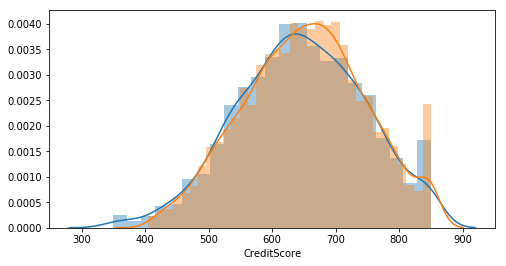

In [ ]:
#importing libraries
import numpy
import pandas
#loading the dataset
bank=pandas.read_csv(r"Bank_customer_modelling.csv")
#drop some features which are not important
bank.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
bank2=bank.copy()
#encode the geography into numerical
from sklearn.preprocessing import LabelEncoder
#encoding geography
le1=LabelEncoder()
le1.fit(bank.Geography)
bank.Geography=le1.transform(bank.Geography)
#encode gender
le2=LabelEncoder()
le2.fit(bank.Gender)
bank.Gender=le2.transform(bank.Gender)
x=bank.drop(['Exited'],axis=1)
y=bank['Exited']
x=numpy.array(x)
y=numpy.array(y)
#onehot encoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[1])
ohe.fit(x)
x=ohe.transform(x).toarray()
#split our data into train and test
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.2)
#scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtr)
xtr=sc.transform(xtr)
xts=sc.transform(xts)
#Apply the neural network
from sklearn.neural_network import MLPClassifier
alg=MLPClassifier(hidden_layer_sizes=(5,5),tol=1e-10,max_iter=1000,verbose=True)
#train the network
alg.fit(xtr,ytr)
#check the accuracy
accuracy=alg.score(xts,yts)
print(accuracy)
ip=numpy.array([1,0,0,590,1,38,3,84250,2,1,1,100000.0]).reshape(1,12)
out=alg.predict(ip)
print(out)
yp=alg.predict(xts)
from sklearn import metrics
recallrate=metrics.recall_score(yts,yp)
print(recallrate)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.distplot(bank.CreditScore[bank.Exited==1])
sns.distplot(bank.CreditScore[bank.Exited==0])
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.distplot(bank.Age[bank.Exited==1])
sns.distplot(bank.Age[bank.Exited==0])
plt.show()